# Exercise 3

Generate a training dataset containing 30 observations with two predictors centered around -0.5 and 0.5 with a cluster standard deviation of 0.4 and one qualitative response variable. Define classes that takes "Red" when response variable is positive and "Blue" otherwise. Use this generated dataset to make a prediction for $y$ when $X1 = X2 = 0.25$ using $K$-nearest neighbours.

a) Compute the Euclidean distance between each observations and the test points.

b) What is the class prediction with $K = 1$?

c) What is the class prediction with $K = 5$?

d) Plot the classification points with decision boundary for $K = 5$.

# Solution

## KNN

#### Generate dataset

We use `scikit-learn` to generate datasets with centers [0.5,0.5], [-0.5,-0.5] and cluster standard deviation of 0.4.

#### Finding the neighbors

Distance can be thought of as a measure of similarity. Euclidean distance is the most commonly used but other distance metrics such as Manhattan work as well. The generalized distance metric is called the Minkowski distance, defined as,

$$ d=\bigg( \sum_{n=i}^n |x_i=y_i|^p \bigg)^{1/p} $$

where $x_i$ and $y_i$ are the two observations for which distance $d$ is being calculated with a hyperparameter, integer $p$.

When $p=1$, the Minkowski distance is the Manhattan distance and when $p=2$, the Minkowski distance is the just the standard Euclidean distance. With the $K$ neighbors identified using distance metrics, the algorithm can make a classification or prediction with the label values of the neighbors.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
X, y = make_blobs(n_samples=30, 
                  centers=[[0.5,0.5],[-0.5,-0.5]], 
                  cluster_std=0.4, 
                  random_state=110)

In [3]:
df = pd.DataFrame({'X1':X[:, 0], 
                   'X2':X[:, 1], 
                   'Y':y})

# specify the class
df['Class'] = df['Y'].apply(lambda x: 'Red' if x>0 else 'Blue')

### a)  Compute the Euclidean distance between each observations and the test points.

In [4]:
# calculate the distance of each row of X1 X2 to the point (0.25, 0.25)
euclidean_distances(df[['X1', 'X2']], [[0.25, 0.25]]).reshape(-1)

array([1.04733706, 0.8183411 , 0.93138861, 1.28750235, 1.02462777,
       0.85018765, 0.28648156, 0.89127618, 0.55455989, 0.27842884,
       0.70368494, 0.38753712, 0.84257862, 0.9471529 , 0.47235871,
       0.19098565, 0.95638954, 1.00819387, 1.3023314 , 1.3134449 ,
       0.3655316 , 1.17904817, 0.67913933, 1.02871351, 1.46123314,
       1.05268573, 0.51941787, 1.15065779, 0.91075985, 0.4731966 ])

In [5]:
edist = pd.Series(euclidean_distances(df[['X1', 'X2']], 
                                      [[0.25, 0.25]]).reshape(-1), 
                  name='Euclidean') 

df = pd.concat([df, edist], axis=1) 
df.head()

,X1,X2,Y,Class,Euclidean
0,-0.621282,-0.331191,1,Red,1.047337
1,0.410545,-0.552438,0,Blue,0.818341
2,-0.046838,-0.632821,1,Red,0.931389
3,-0.455832,-0.826784,1,Red,1.287502
4,-0.087054,1.217604,0,Blue,1.024628


### b) What is the class prediction with K = 1?

In [6]:
df.nsmallest(1,'Euclidean')

,X1,X2,Y,Class,Euclidean
15,0.434864,0.202033,0,Blue,0.190986


### c) What is the class prediction with K = 5?

In [7]:
df.nsmallest(5,'Euclidean')

,X1,X2,Y,Class,Euclidean
15,0.434864,0.202033,0,Blue,0.190986
9,0.152672,0.510864,0,Blue,0.278429
6,0.518747,0.349231,0,Blue,0.286482
20,-0.107496,0.173775,0,Blue,0.365532
11,0.631439,0.181521,0,Blue,0.387537


### d) Draw decision doundary with K=5.

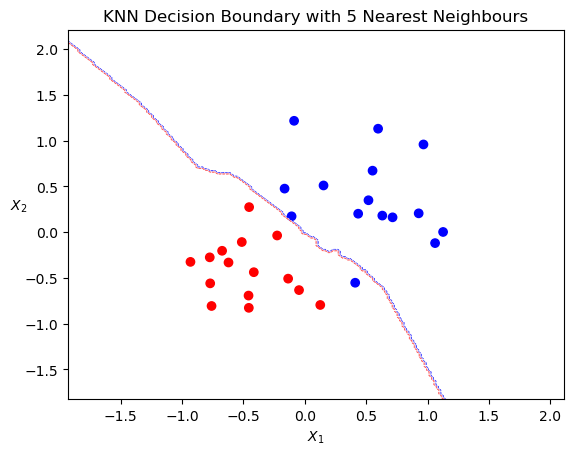

In [10]:
def plot_boundary(x, y, k):

    # Instantiate the model object 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fits the model 
    knn.fit(x, y)

    # Step size of the mesh 
    h = .02

    # Plot the decision boundary.

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    # Create Meshgrid 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict labels for each point in mesh 
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape to match dimensions 
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contour(xx, yy, Z, cmap=plt.cm.bwr, linestyles = 'dashed', linewidths=0.5) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr) 
    plt.title(f'KNN Decision Boundary with {k} Nearest Neighbours') 
    plt.xlabel('$X_1$') 
    plt.ylabel('$X_2$', rotation='horizontal') 
    plt.show()
    
    
# Plot KNN decision boundary with K=5 
plot_boundary(X, y, 5)

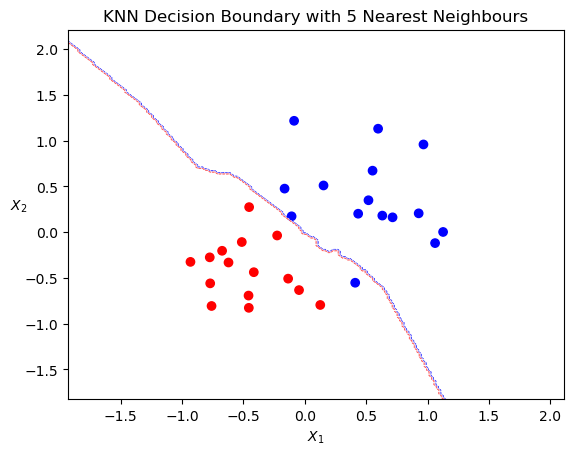

In [11]:
x = X.copy()
k = 5

# Instantiate the model object 
knn = KNeighborsClassifier(n_neighbors=k)

# Fits the model 
knn.fit(X, y)

# Step length of the meshgrid
h = .02

# Plot the decision boundary.

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# Create Meshgrid 
# xx remains the same, but yy growth at the step length `h`
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict labels for each point in mesh 
# use the knn model trained by X, y to draw a 
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape to match dimensions 
Z = Z.reshape(xx.shape)

# Plotting
plt.contour(xx, yy, Z, cmap=plt.cm.bwr, linestyles = 'dashed', linewidths=0.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr) 
plt.title(f'KNN Decision Boundary with {k} Nearest Neighbours') 
plt.xlabel('$X_1$') 
plt.ylabel('$X_2$', rotation='horizontal') 
plt.show()

# References
* Scikit-learn GridSearchCV
* Scikit-learn KNN
* Python resources